## CCI 501 - Machine Learning
**Univariate Linear Regression group assignment**
- Esther Mbithe
- Kevin Odhiambo
- Peter Kariuki Mutuura

#### Link to the report
[https://docs.google.com/document/d/17-tYfuybZgKOfkrzo_ppmJGc29_o72OKrXOvZ_iEBq8/edit?usp=sharing](https://docs.google.com/document/d/17-tYfuybZgKOfkrzo_ppmJGc29_o72OKrXOvZ_iEBq8/edit?usp=sharing)

#### Link to the code
[https://github.com/peterkariukimutuura/Machine-Learning-Assignment-two](https://github.com/peterkariukimutuura/Machine-Learning-Assignment-two)

## Importing data and  the relevant libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("covid_data.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [85]:
data.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.961717,0.967555,0.974772,0.778126,0.800648,0.084423,0.030916,0.041290,0.090733,...,0.008795,-0.031320,-0.029703,0.015266,-0.011237,-0.013153,0.030660,-0.015671,0.006868,0.094370
new_cases,0.961717,1.000000,0.994363,0.966051,0.871265,0.880854,0.067655,0.057824,0.065055,0.073794,...,0.002688,-0.028200,-0.030507,0.013812,-0.011104,-0.012954,0.031474,-0.015870,0.005350,0.093176
new_cases_smoothed,0.967555,0.994363,1.000000,0.972452,0.865955,0.888333,0.068181,0.049388,0.065098,0.074587,...,0.001992,-0.027867,-0.030694,0.014406,-0.012198,-0.013718,0.031338,-0.016961,0.004638,0.092689
total_deaths,0.974772,0.966051,0.972452,1.000000,0.848603,0.875236,0.071000,0.025284,0.031664,0.121472,...,0.013259,-0.043435,-0.049206,0.017048,-0.004664,-0.015070,0.041229,-0.018455,0.019997,0.156134
new_deaths,0.778126,0.871265,0.865955,0.848603,1.000000,0.972204,0.041882,0.033216,0.041047,0.069043,...,0.002253,-0.038793,-0.042756,0.014753,-0.012876,-0.019210,0.040397,-0.021487,0.010296,0.108023
new_deaths_smoothed,0.800648,0.880854,0.888333,0.875236,0.972204,1.000000,0.043387,0.029707,0.041039,0.073780,...,0.002148,-0.039380,-0.044236,0.015483,-0.013547,-0.020358,0.040824,-0.022685,0.010211,0.116478
total_cases_per_million,0.084423,0.067655,0.068181,0.071000,0.041882,0.043387,1.000000,0.478509,0.648920,0.607907,...,0.371065,-0.244734,-0.198303,0.125010,0.120283,-0.037537,0.301634,0.027652,0.275317,0.279895
new_cases_per_million,0.030916,0.057824,0.049388,0.025284,0.033216,0.029707,0.478509,1.000000,0.757691,0.294042,...,0.192130,-0.178676,-0.115065,0.070293,0.159465,0.006218,0.256825,0.065169,0.157552,0.195592
new_cases_smoothed_per_million,0.041290,0.065055,0.065098,0.031664,0.041047,0.041039,0.648920,0.757691,1.000000,0.363505,...,0.217513,-0.196981,-0.137691,0.089517,0.177285,0.003145,0.291420,0.066368,0.204307,0.225157
total_deaths_per_million,0.090733,0.073794,0.074587,0.121472,0.069043,0.073780,0.607907,0.294042,0.363505,1.000000,...,0.275664,-0.264409,-0.302190,-0.059495,0.304718,-0.102527,0.271453,0.045937,0.341079,0.337119


In [86]:
data.shape

(55893, 49)

In [87]:
stringtwo = " , ".join(map(str,data.columns.values))

In [88]:
stringtwo

'iso_code , continent , location , date , total_cases , new_cases , new_cases_smoothed , total_deaths , new_deaths , new_deaths_smoothed , total_cases_per_million , new_cases_per_million , new_cases_smoothed_per_million , total_deaths_per_million , new_deaths_per_million , new_deaths_smoothed_per_million , icu_patients , icu_patients_per_million , hosp_patients , hosp_patients_per_million , weekly_icu_admissions , weekly_icu_admissions_per_million , weekly_hosp_admissions , weekly_hosp_admissions_per_million , total_tests , new_tests , total_tests_per_thousand , new_tests_per_thousand , new_tests_smoothed , new_tests_smoothed_per_thousand , tests_per_case , positive_rate , tests_units , stringency_index , population , population_density , median_age , aged_65_older , aged_70_older , gdp_per_capita , extreme_poverty , cardiovasc_death_rate , diabetes_prevalence , female_smokers , male_smokers , handwashing_facilities , hospital_beds_per_thousand , life_expectancy , human_development_ind

In [89]:
data.corr()['icu_patients'].sort_values(ascending=False)

icu_patients                          1.000000
new_deaths_smoothed                   0.970402
hosp_patients                         0.966274
new_deaths                            0.918377
population                            0.905057
new_cases_smoothed                    0.827325
new_cases                             0.800850
weekly_hosp_admissions                0.799365
new_tests_smoothed                    0.779247
new_tests                             0.767732
total_deaths                          0.755226
total_cases                           0.693952
total_tests                           0.652516
weekly_icu_admissions                 0.592351
diabetes_prevalence                   0.428136
icu_patients_per_million              0.419619
new_deaths_smoothed_per_million       0.382706
hosp_patients_per_million             0.368814
total_cases_per_million               0.360198
new_deaths_per_million                0.352291
stringency_index                      0.289599
positive_rate

In [90]:
data.shape

(55893, 49)

In [91]:
data.continent.value_counts()

Europe           14475
Africa           13252
Asia             13206
North America     8864
South America     3313
Oceania           2151
Name: continent, dtype: int64

In [92]:
# data.isnull().sum()

# Data Preprocessing 

In [93]:
diabetes_icu_patients = data[['diabetes_prevalence','icu_patients']]

In [94]:
diabetes_icu_patients.isnull().sum()

diabetes_prevalence     4380
icu_patients           51792
dtype: int64

In [95]:
diabetes_icu_patients.isnull().sum()

diabetes_prevalence     4380
icu_patients           51792
dtype: int64

In [96]:
# diabetes_icu_patients.diabetes_prevalence.fillna(diabetes_icu_patients.diabetes_prevalence.mean(),inplace=True)

In [97]:
# diabetes_icu_patients.icu_patients.fillna(diabetes_icu_patients.icu_patients.mean(),inplace=True)

In [98]:
diabetes_icu_patients.isnull().sum()

diabetes_prevalence     4380
icu_patients           51792
dtype: int64

In [99]:
clean_data_diabetes_icu = diabetes_icu_patients.dropna(subset=['icu_patients'])
# clean_data_diabetes_icu = diabetes_icu_patients

In [100]:
clean_data_diabetes_icu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4101 entries, 3039 to 52287
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diabetes_prevalence  4101 non-null   float64
 1   icu_patients         4101 non-null   float64
dtypes: float64(2)
memory usage: 96.1 KB


In [101]:
clean_data_diabetes_icu.corr()

,diabetes_prevalence,icu_patients
diabetes_prevalence,1.000000,0.428136
icu_patients,0.428136,1.000000


In [102]:
clean_data_diabetes_icu.isnull().sum()

diabetes_prevalence    0
icu_patients           0
dtype: int64

# Data visualization

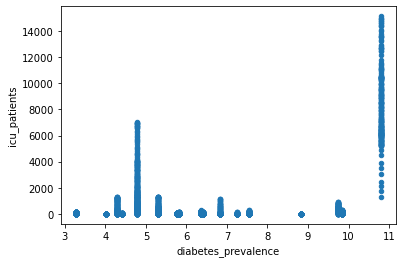

In [103]:
clean_data_diabetes_icu.plot(kind="scatter",x="diabetes_prevalence",y="icu_patients")
plt.show()

# Split data into train , validation , and test set

In [104]:
X = pd.DataFrame(clean_data_diabetes_icu['diabetes_prevalence'])
Y = pd.DataFrame(clean_data_diabetes_icu['icu_patients'])

In [105]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=32)

X_val , X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=32)

In [106]:
X_train.to_csv('data/train_features.csv',index=False)
X_val.to_csv('data/val_features.csv',index=False)
X_val.to_csv('data/test_features.csv',index=False)

y_train.to_csv('data/train_labels.csv',index=False)
y_val.to_csv('data/val_labels.csv',index=False)
y_test.to_csv('data/test_labels.csv',index=False)

# Train the Model

In [107]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [108]:
print("Model coefficient : " ,model.coef_, "\n\n Model intercept : ",model.intercept_)

Model coefficient :  [[452.58940692]] 

 Model intercept :  [-2132.26852383]


In [109]:
model.score(X_val,y_val)

0.11574246066053229